# Visual Data Analysis of the Gapminder data
Data source: https://www.gapminder.org/

In [33]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imageio.v2 as imageio

## A) Plotting a histogramm for the Life Expectancy Data

In [6]:
# Load gapminder data into a pandas dataframe
fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
lifeexp = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)
population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)

In [7]:
# Select a few columns with years.
lifeexp = lifeexp[[1950, 1975, 2000, 2015]]

Text(0.5, 1.0, 'Histogram with default settings')

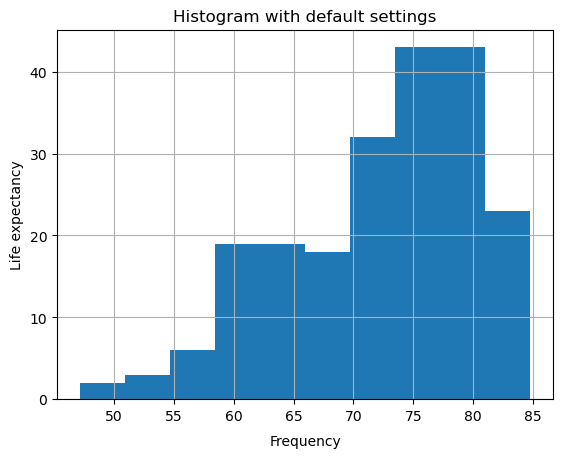

In [8]:
# Draw a histogram for 2015 with the default settings.
lifeexp[2015].hist()
# Set axis labels and title
plt.xlabel("Frequency", labelpad=8)
plt.ylabel('Life expectancy', labelpad=4)
plt.title("Histogram with default settings")

Text(0.5, 1.0, 'Distribution of Lifeexpectancy - 5 bins')

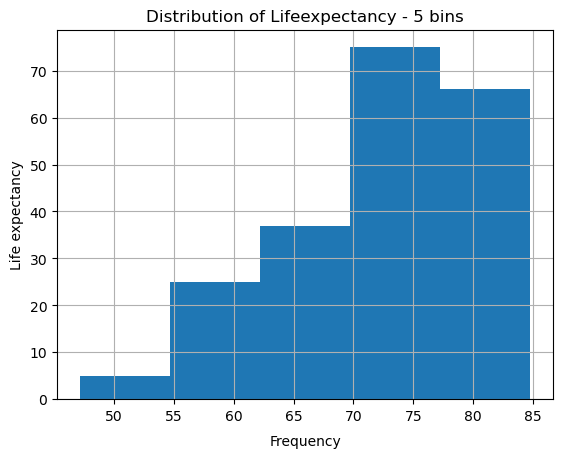

In [9]:
# Try a few values for the number of bins.
lifeexp[2015].hist(bins=5)
plt.xlabel("Frequency", labelpad=8)
plt.ylabel('Life expectancy', labelpad=4)
plt.title("Distribution of Lifeexpectancy - 5 bins")

Text(0.5, 1.0, 'Distribution of Lifeexpectancy - 10 bins')

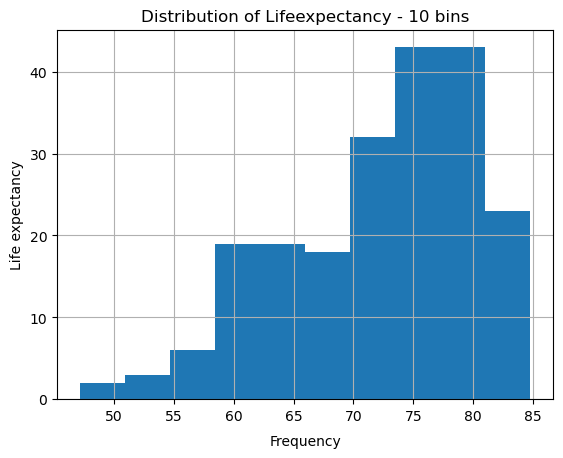

In [10]:
lifeexp[2015].hist(bins=10)
plt.xlabel("Frequency", labelpad=8)
plt.ylabel('Life expectancy', labelpad=4)
plt.title("Distribution of Lifeexpectancy - 10 bins")

Text(0.5, 1.0, 'Distribution of Lifeexpectancy - 20 bins')

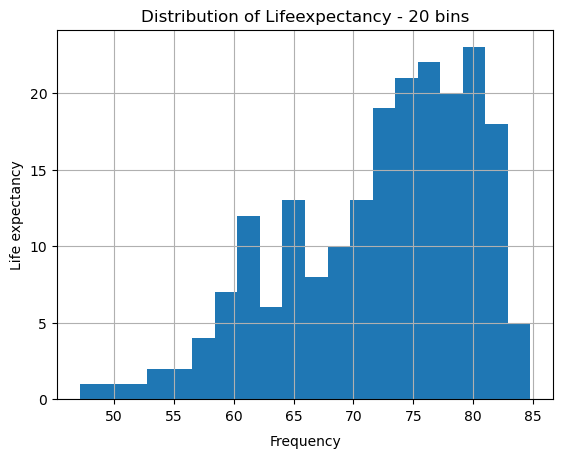

In [11]:
lifeexp[2015].hist(bins=20)
plt.xlabel("Frequency", labelpad=8)
plt.ylabel('Life expectancy', labelpad=4)
plt.title("Distribution of Lifeexpectancy - 20 bins")

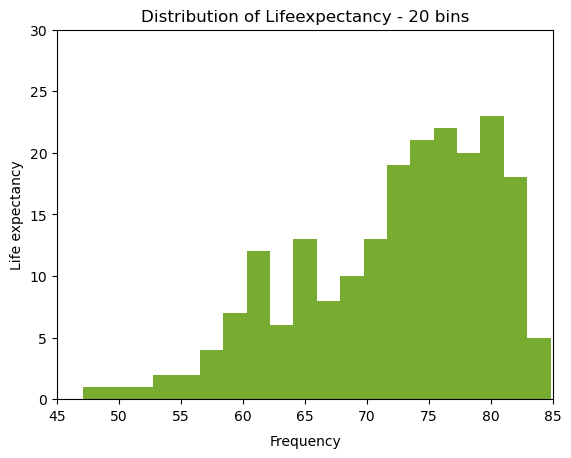

In [13]:
# Style bar plot
lifeexp[2015].hist(bins=20, facecolor='#77AC30', histtype='bar')
# Set the min/max x and y values with plt.axis.
plt.axis([45.0, 85.0, 0.0, 30.0])
# Try some optional parameters for the hist() function (see above)
plt.grid(visible=None)
plt.xlabel("Frequency", labelpad=8)
plt.ylabel('Life expectancy', labelpad=4)
plt.title("Distribution of Lifeexpectancy - 20 bins")
# Set the resolution of the image and create an png and svg image file.
plt.savefig('histo.png', dpi=150)
plt.savefig('histo.svg', dpi=150)

## B) Plot a scatter plot with matplot lib

Text(0.5, 1.0, 'Life Expectancy in the yeas 2000 versus 2010')

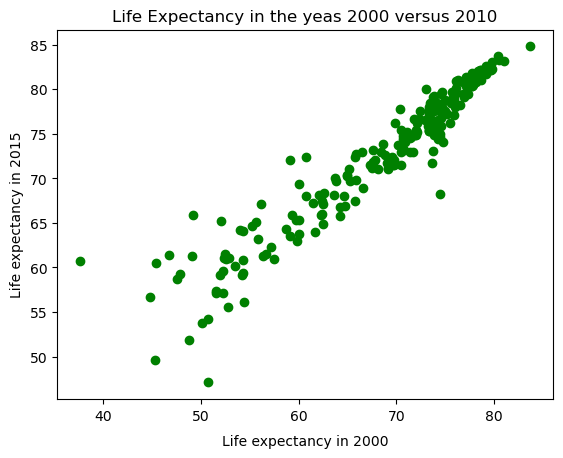

In [14]:
# Creating a scatter plot for comparing the Life expectancy data for the years 2000 and 2015
plt.scatter(lifeexp[2000], lifeexp[2015], color='green')
plt.xlabel("Life expectancy in 2000", labelpad=8)
plt.ylabel('Life expectancy in 2015', labelpad=4)
plt.title("Life Expectancy in the yeas 2000 versus 2010")
# A good correlation was found. Only for two countries significant changes in the life expectancy took place

## C) Create scatter plot for Fertility Rate, Life Expectancy, and Population Data

In [15]:
# Re-load gapminder data into a pandas dataframe in order to start out from the original data again
fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
lifeexp = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)
population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)

In [16]:
# Check shape
print("Fertility:", fert.shape)
print("Life expectancy:", lifeexp.shape)
print("Population:", population.shape)

Fertility: (260, 216)
Life expectancy: (260, 217)
Population: (275, 81)


In [17]:
# Inspect columns
fert.columns # Strings as column headers

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [18]:
lifeexp.columns # Integers as column headers

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [19]:
# Convert column headers of fertility data to integers
fert.columns = fert.columns.astype(int)

In [20]:
# Inspect index
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [21]:
lifeexp.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', name='Life expectancy', length=260)

In [22]:
# Change index name
fert.index.name = 'country'
lifeexp.index.name = 'country'

In [23]:
# Move row index into column
fert = fert.reset_index()
lifeexp = lifeexp.reset_index()

In [24]:
# Convert to long format
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility')
lifeexp = lifeexp.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [25]:
# Process population data accordingly

# Check dimensions
population.shape
# Check columns
population.columns # Column headers are floats -> convert to interger
population.columns = population.columns.astype(int)
# Check index and reset it
population.index
population.index.name = 'country'
population = population.reset_index()
# Change table from wide to long format
population = population.melt(id_vars='country', var_name='year', value_name='population')
# Check output
population

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


In [26]:
# Merge data
fert_pop = pd.merge(fert, lifeexp, how='inner')
fert_pop_life = pd.merge(fert_pop, population, how='inner')
# Check merged table
fert_pop_life.shape

(20979, 5)

#### Static Scatterplot creation

Generate scatter plot for the year 2000 - for testing before generation of images for animation

A) Create basic scatter plot

Text(0, 0.5, 'Fertility rate')

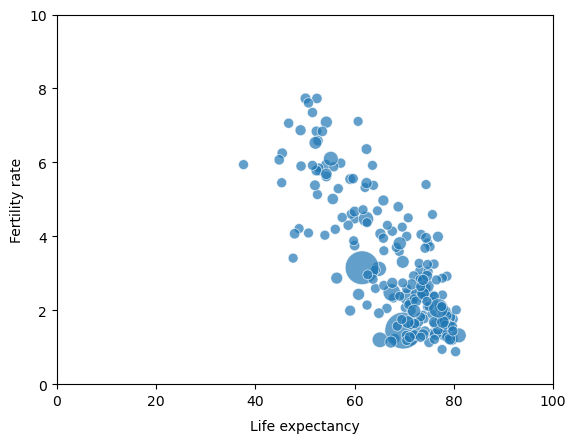

In [27]:
df_subset = fert_pop_life.loc[fert_pop_life['year'] == 2000]
plt.axis((0, 100, 0, 10))
sns.scatterplot(x='life_expectancy', y='fertility', data=df_subset, alpha=0.7, size='population', sizes=(50,700), legend=False)
plt.xlabel("Life expectancy", labelpad=8)
plt.ylabel('Fertility rate', labelpad=4)

### Add label for a certain country

Text(69.8, 1.45, 'China')

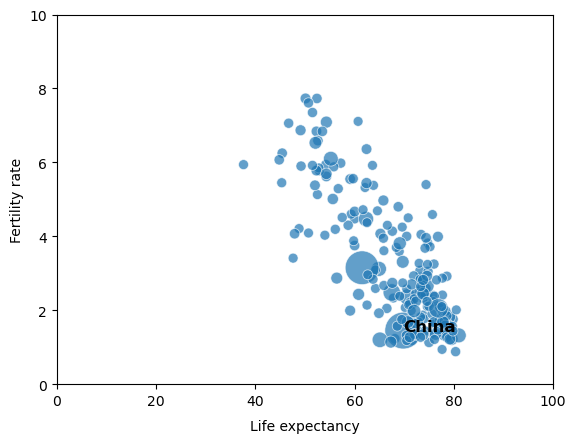

In [28]:
plt.close()
plt.axis((0, 100, 0, 10))
mark_country = "China"
sns.scatterplot(x='life_expectancy', y='fertility', data=df_subset, alpha=0.7, size='population', sizes=(50,700), legend=False)
plt.xlabel("Life expectancy", labelpad=8)
plt.ylabel('Fertility rate', labelpad=4)

x_cor = float(df_subset.loc[df_subset['country']==mark_country, ['life_expectancy']].values[0])
y_cor = float(df_subset.loc[df_subset['country']==mark_country, ['fertility']].values[0])
plt.text(x=x_cor, y=y_cor, s=mark_country, fontsize=12, weight='bold')

### Marking an interesting country
It cannot be deduced which cycle belongs to "Germany". Possible solution: Color the cycle of the country that shall be highlighted differently.

Text(69.8, 1.45, 'China')

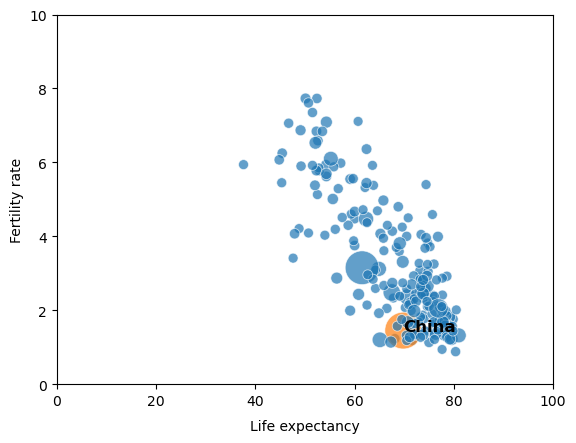

In [29]:
plt.close()

# Add color definition
mark_country = 'China'
conditions = [
    (fert_pop_life['country'] == mark_country),
    (fert_pop_life['country'] != mark_country)
]

color = ["orange", "blue"]
fert_pop_life['color'] = np.select(conditions, color)

# Re-create subset
df_subset = fert_pop_life.loc[fert_pop_life['year'] == 2000]

# Re-create the plot
plt.axis((0, 100, 0, 10))
sns.scatterplot(x='life_expectancy', y='fertility', data=df_subset, alpha=0.7, size='population', sizes=(50,700), legend=False, hue='color')
plt.xlabel("Life expectancy", labelpad=8)
plt.ylabel('Fertility rate', labelpad=4)

x_cor = float(df_subset.loc[df_subset['country']==mark_country, ['life_expectancy']].values[0])
y_cor = float(df_subset.loc[df_subset['country']==mark_country, ['fertility']].values[0])
plt.text(x=x_cor, y=y_cor, s=mark_country, fontsize=12, weight='bold')

### Creation of dynamic scatter plot

Generate images for the years 1960 - 2015

In [30]:
plt.close()

for y in range(1960, 2016):
    df_subset = fert_pop_life.loc[fert_pop_life['year'] == y]
    
    plt.axis((0, 100, 0, 10))
    sns.scatterplot(x='life_expectancy', y='fertility', data=df_subset, alpha=0.7, size='population', sizes = (50,700), legend=False, hue='color')
    plt.xlabel("Life expectancy", labelpad=8)
    plt.ylabel('Fertility rate', labelpad=4)
    plt.title("Year "+str(y))

    x_cor = float(df_subset.loc[df_subset['country']==mark_country, ['life_expectancy']].values[0])
    y_cor = float(df_subset.loc[df_subset['country']==mark_country, ['fertility']].values[0])
    plt.text(x=x_cor, y=y_cor, s=mark_country, fontsize=12, weight='bold')

    plt.savefig(f'plot_lifeexp_vs_fertility{y}.png')
    plt.close()

Create animation

In [34]:
images = []
for i in range(1960, 2016):
    filename = 'plot_lifeexp_vs_fertility{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('animation_lifeexp_vs_fertility.gif', images, fps=2000000)

### Color by country

Load continent information

In [35]:
continents = pd.read_csv("../data/continents.csv", sep=";")
continents

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


Merge gapminder and continent data

In [36]:
fert_pop_life = pd.merge(fert_pop_life, continents, how="inner")
fert_pop_life

,country,year,fertility,life_expectancy,population,color,continent
0,Afghanistan,1800,7.00,28.21,3280000.0,blue,Asia
1,Afghanistan,1810,7.00,28.11,3280000.0,blue,Asia
2,Afghanistan,1820,7.00,28.01,3323519.0,blue,Asia
3,Afghanistan,1830,7.00,27.90,3448982.0,blue,Asia
4,Afghanistan,1840,7.00,27.80,3625022.0,blue,Asia
...,...,...,...,...,...,...,...
14170,Zimbabwe,2011,3.64,51.60,14255592.0,blue,Africa
14171,Zimbabwe,2012,3.56,54.20,14565482.0,blue,Africa
14172,Zimbabwe,2013,3.49,55.70,14898092.0,blue,Africa
14173,Zimbabwe,2014,3.41,57.00,15245855.0,blue,Africa


Generate scatterplot colored by continent

Text(69.8, 1.45, 'China')

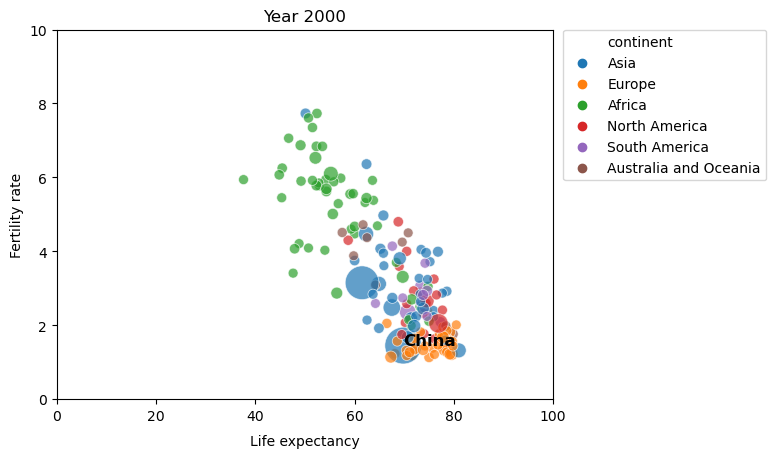

In [37]:
plt.close()

mark_country = 'China'

# Re-create subset
df_subset = fert_pop_life.loc[fert_pop_life['year'] == 2000]

# Create the plot
plt.axis((0, 100, 0, 10))
scatter = sns.scatterplot(x='life_expectancy', y='fertility', data=df_subset, alpha=0.7, size='population', sizes=(50,700), hue='continent')
plt.xlabel("Life expectancy", labelpad=8)
plt.ylabel('Fertility rate', labelpad=4)
plt.title("Year 2000")
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles = handles[0:7], labels=labels[0:7], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

x_cor = float(df_subset.loc[df_subset['country']==mark_country, ['life_expectancy']].values[0])
y_cor = float(df_subset.loc[df_subset['country']==mark_country, ['fertility']].values[0])
plt.text(x=x_cor, y=y_cor, s=mark_country, fontsize=12, weight='bold')

In [38]:
plt.close()

for y in range(1960, 2016):
    df_subset = fert_pop_life.loc[fert_pop_life['year'] == y]
    
    plt.axis((0, 100, 0, 10))
    scatter = sns.scatterplot(x='life_expectancy', y='fertility', data=df_subset, alpha=0.85, size='population', sizes = (50,700), legend=True, hue='continent')
    plt.xlabel("Life expectancy", labelpad=8)
    plt.ylabel('Fertility rate', labelpad=4)
    plt.title("Year "+str(y))
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles = handles[0:7], labels=labels[0:7], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    x_cor = float(df_subset.loc[df_subset['country']==mark_country, ['life_expectancy']].values[0])
    y_cor = float(df_subset.loc[df_subset['country']==mark_country, ['fertility']].values[0])
    plt.text(x=x_cor, y=y_cor, s=mark_country, fontsize=12, weight='bold')
    plt.tight_layout()
    plt.savefig(f'plot_lifeexp_vs_fertility_ColoredByContinent{y}.png', dpi=150)
    plt.close()

Create animation

In [39]:
images = []
for i in range(1960, 2016):
    filename = 'plot_lifeexp_vs_fertility_ColoredByContinent{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('animation_lifeexp_vs_fertility_ColoredByContinent.gif', images, fps=2000000)

## D) Analyze other data from Gapminder project

The following data were retrieved from the Gapminder project (https://www.gapminder.org/data/):
- Estimated percentage of adults aged 15 to 49 years that are newly infected with HIV during the given year.
- Human development index - Used to rank countries by level of "human development". It contians three dimensions: health level, educational level and living standard.
- Reported number of new and relapsed TB cases (all forms) among 100,000 residence for the given year.

In [43]:
# Loading data downloaded from 
hdi = pd.read_csv('../data/hdi_human_development_index.csv', index_col=0)
hiv = pd.read_csv('../data/newly_hiv_infected_percent_age_15_49.csv', index_col=0)
tb = pd.read_csv('../data/all_forms_of_tb_new_cases_per_100000_reported.csv', index_col=0)

In [44]:
# Check shape
print("Dimensions original education data:", hdi.shape)
print("Dimensions original HIV data:", hiv.shape)
print("Dimensions original TB data:", tb.shape)

Dimensions original education data: (189, 30)
Dimensions original HIV data: (143, 22)
Dimensions original TB data: (207, 28)


In [45]:
# Inspect columns
print(hdi.columns) # Strings as column headers -> Convert to integer
print(hiv.columns) # Strings as column headers -> Convert to integer
print(tb.columns) # Strings as column headers -> Convert to integer

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')
Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011'],
      dtype='object')
Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007'],
      dtype='object')


In [46]:
# Convert column headers to integers (conversion not necessary, but done as easier to handle)
hdi.columns = hdi.columns.astype(int)
hiv.columns = hiv.columns.astype(int)
tb.columns = tb.columns.astype(int)

In [47]:
# Inspect index
print(hdi.index)
print(hiv.index)
print(tb.index)

Index(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria',
       ...
       'Uzbekistan', 'St. Vincent and the Grenadines', 'Venezuela', 'Vietnam',
       'Vanuatu', 'Samoa', 'Yemen', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=189)
Index(['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       ...
       'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Venezuela', 'Vietnam',
       'Yemen', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=143)
Index(['Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'Netherlands Antilles', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa',
       ...
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu',
       'Wallis et Futuna', 'Samoa', 'Yem

In [48]:
# Change index name
hdi.index.name = 'country'
hiv.index.name = 'country'
tb.index.name = 'country'

In [49]:
# Move row index into column
hdi = hdi.reset_index()
hiv = hiv.reset_index()
tb = hiv.reset_index()

In [50]:
# Convert to long format
hdi = hdi.melt(id_vars='country', var_name='year', value_name='human_development_index')
hiv = hiv.melt(id_vars='country', var_name='year', value_name='hiv_infected_percent')
tb = tb.melt(id_vars='country', var_name='year', value_name='ntb_cases_per100k')

In [51]:
# Merge data
merged_df = pd.merge(hdi, hiv, how='inner')
merged_df = pd.merge(merged_df, tb, how='inner')

In [52]:
# Check merged dataframe
print(merged_df['year'].unique())
print("Dimensions of merged table before cleanup: ", merged_df.shape)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011]
Dimensions of merged table before cleanup:  (3124, 5)


In [53]:
# Check if still cells without data exist
print("Number of cells without data:\n", merged_df.isna().sum())

Number of cells without data:
 country                       0
year                          0
human_development_index     195
hiv_infected_percent       1579
ntb_cases_per100k          1579
dtype: int64


In [54]:
# Remove the rows with missing values
merged_df = merged_df.dropna()
print("Dimensions of merged table after cleanup: ", merged_df.shape)

Dimensions of merged table after cleanup:  (1429, 5)


In [55]:
# Analyze which are the largest values
merged_df.sort_values('hiv_infected_percent').tail(50)

,country,year,human_development_index,hiv_infected_percent,ntb_cases_per100k
2207,Lesotho,2005,0.436,2.85,2.85
2491,Lesotho,2007,0.441,2.88,2.88
2349,Lesotho,2006,0.436,2.89,2.89
162,Botswana,1991,0.579,2.90,2.90
2822,Eswatini,2009,0.498,2.90,2.90
1133,South Africa,1997,0.646,2.90,2.90
1497,Lesotho,2000,0.459,2.90,2.90
1417,South Africa,1999,0.635,2.97,2.97
834,Eswatini,1995,0.523,3.01,3.01
2680,Eswatini,2008,0.487,3.05,3.05


In [56]:
merged_df.sort_values('ntb_cases_per100k').tail(50)

,country,year,human_development_index,hiv_infected_percent,ntb_cases_per100k
2207,Lesotho,2005,0.436,2.85,2.85
2491,Lesotho,2007,0.441,2.88,2.88
2349,Lesotho,2006,0.436,2.89,2.89
162,Botswana,1991,0.579,2.90,2.90
2822,Eswatini,2009,0.498,2.90,2.90
1133,South Africa,1997,0.646,2.90,2.90
1497,Lesotho,2000,0.459,2.90,2.90
1417,South Africa,1999,0.635,2.97,2.97
834,Eswatini,1995,0.523,3.01,3.01
2680,Eswatini,2008,0.487,3.05,3.05


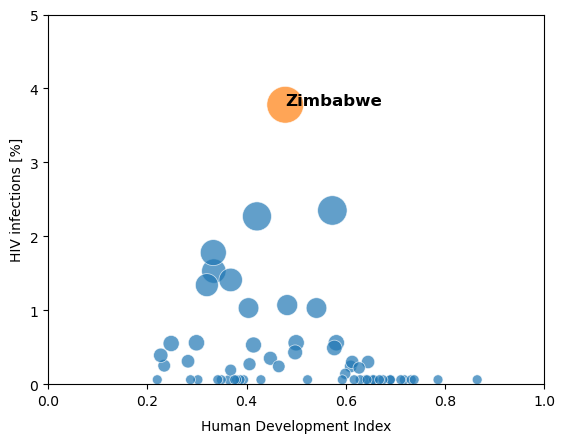

In [57]:
# Test Scatterplot creation

# Add color definition
mark_country = 'Zimbabwe'
conditions = [
    (merged_df['country'] == mark_country),
    (merged_df['country'] != mark_country)
]

color = ["orange", "blue"]
merged_df['color'] = np.select(conditions, color)

# Test scatter plot creation for one subset
df_subset = merged_df.loc[merged_df['year'] == 1990]

plt.axis((0, 1, 0, 5))
sns.scatterplot(x='human_development_index', y='hiv_infected_percent', data=df_subset, alpha=0.7, size='ntb_cases_per100k', sizes=(50,700), legend=False, hue='color')
plt.xlabel("Human Development Index", labelpad=8)
plt.ylabel('HIV infections [%]', labelpad=4)

# Prevent label assignment if country to mark is not in data set
if(mark_country in list(df_subset['country'].unique())):
    x_cor = float(df_subset.loc[df_subset['country']==mark_country, ['human_development_index']].values[0])
    y_cor = float(df_subset.loc[df_subset['country']==mark_country, ['hiv_infected_percent']].values[0])
    plt.text(x=x_cor, y=y_cor, s=mark_country, fontsize=12, weight='bold')

In [58]:
plt.close()

# Generate plots for the years 1990-2011
for y in range(1990, 2012):
    plt.axis((0, 1, 0, 7))
    df_subset = merged_df.loc[merged_df['year'] == y]
    
    sns.scatterplot(x='human_development_index', y='hiv_infected_percent', data=df_subset, alpha=0.7, size='ntb_cases_per100k', sizes=(50,700), legend=False, hue='color')
    plt.xlabel("Human Development Index", labelpad=8)
    plt.ylabel('HIV infections [%]', labelpad=4)
    plt.title("Year "+str(y))

    if(mark_country in list(df_subset['country'].unique())):
        x_cor = float(df_subset.loc[df_subset['country']==mark_country, ['human_development_index']].values[0])
        y_cor = float(df_subset.loc[df_subset['country']==mark_country, ['hiv_infected_percent']].values[0])
        plt.text(x=x_cor, y=y_cor, s=mark_country, fontsize=12, weight='bold')

    plt.savefig(f'hdi_vs_hiv_zimbabwe{y}.png')
    plt.close()

In [59]:
# Create video
images = []
for i in range(1990, 2012):
    filename = 'hdi_vs_hiv_zimbabwe{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('animation_hdi_vs_hiv_zimbabwe.gif', images, fps=2000000)